## Homework 5 (A prerequisite for Project)

In your project, you are expected to evaluate alternative trading strategies (i.e. algorithmic trading). "Algorithmic or Quantitative trading is the process of designing and developing trading strategies based on mathematical and statistical analyses" ([source](https://www.freecodecamp.org/news/algorithmic-trading-in-python/)). This requires a connection to a data source and this homework is related to setting up the required connections and some simple data manipulation steps. 


### Task 1
This task requires to set up a free account for Quandl API [https://docs.data.nasdaq.com/](https://docs.data.nasdaq.com/). This [link](https://docs.data.nasdaq.com/docs/python-installation) provides the details about installation of the quandl module and setting up authentication details to get relevant information.

- Install quandl using command window (or web interface will also work fine if you use Anaconda Navigator) <br> 
pip install quandl
- Check if it is installed by importing the module as below. If there is no error, you are good to go.

In [3]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\gunes\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import quandl

- Create an account if you do not have any from the [link](https://data.nasdaq.com/sign-up). Signing-up as "academic" is suggested.
- You will receive your API key once you complete your registration. 
- If you already have an account, you can find your API key from your account details.
- We will import pandas and quandl modules to check if everything works. 
- Set your API key (i.e. register within Python)
- Send a sample data request.

In [9]:
import pandas as pd
import quandl as q
# set the API key
q.ApiConfig.api_key = "VqqeqGUo_fFzJk7Kxbn2"
#send a get request to query Tesla's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")

# check the first 5 rows of the dataframe
tesla_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


Note that get method requires certain arguments in some form. The details of the call is provided [here](https://docs.data.nasdaq.com/docs/parameters-2#section-times-series-parameters). We made a request to TESLA's daily prices between two dates by "WIKI/TSLA". WIKI is a data product code. The details on the data organization is provided [here](https://docs.data.nasdaq.com/docs/data-organization). Some of the products are free as you can see from the link. We have used "WIKI" free product which is "End of Day US Stock Prices" to get TESLA prices. There are some other prices/indices that are available for free. You can check those in you are interested.

Once you have obtained the information in a pandas dataframe, this task is completed.

### Task 2

Implement a function that calculates simple moving average (SMA) of closing prices. Note that simple moving average calculates the average of the values in the most recent past $k$ periods (day in our case). Therefore the function will take an argument "number of periods". Technical analysis people like to use such statistics in order to make trading decisions. You can find [this link](https://www.profitaddaweb.com/2017/07/smasimple-moving-average-technical.html) useful.

In [12]:
def moving_avarage(k,df,column):
    
    #k==periods
    #df=data table
    #column=name of the column
    df_sma=pd.DataFrame(index=df.index)
    for number,row_id in enumerate(df.index[k-1:]):
        df_sma.at[row_id,"{}_{}_SMA".format(column,k)]=df[column].iloc[number:k+number].mean()
    return df_sma

In [13]:
moving_avarage(30,tesla_data,"Close")

,Close_30_SMA
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2017-12-22,319.085667
2017-12-26,319.562333
2017-12-27,319.437000


### Task 3

Implement a function that calculates simple moving standard deviation of closing prices so that one can have some understanding of the volatility in the prices. 

In [14]:
def std_moving_avarage(k,df,column):
    #k==periods
    #df=data table
    #column=name of the column
    
    df_std_sma=pd.DataFrame(index=df.index)
    for number,row_id in enumerate(df.index[k-1:]):
        df_std_sma.at[row_id,"{}_{}_VOL_SMA".format(column,k)]=df[column].iloc[number:k+number].std()
    return df_std_sma

In [15]:
tesla_data["price_change"]=tesla_data["Close"].pct_change()

In [16]:
std_moving_avarage(30,tesla_data,"Close")

,Close_30_VOL_SMA
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2017-12-22,12.261760
2017-12-26,11.886691
2017-12-27,11.951737


In [17]:
std_moving_avarage(30,tesla_data,"price_change")

,price_change_30_VOL_SMA
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2017-12-22,0.019305
2017-12-26,0.019916
2017-12-27,0.018783


### Task 4

Assume that you are asked to devise a simple trading strategy which takes moving standard deviation and average into account. As an example, you may end up with such a strategy:

- If moving standard deviation is larger than some number, do nothing (this is kind of a risk averse setting)
- If last price observed is larger than the average, buy the stock, sell otherwise.

This is just a very simple example based on the moving statistics of the closing prices. You may end up with a better strategy. In order to understand if the strategy is reasonable, we generally try to see the performance of the trading algorithm using a predefined past period. This is so called backtesting. This will be done in a paper-trading setting. A paper trade is a simulated trade that allows an investor to practice buying and selling without risking real money. Note that paper trading may not be representative of the real trade because of the market dynamics.

Here we will assume that you have 1 unit of money allowed for trading each day. You can invest or keep it. If you pass investing on a day (because of some rule you use like in the volatility example above), it is assumed that you lost the opportunity (in other words, the money to be invested is not accumulated for the use on the next day).

Implement a trading strategy based on the statistics and evaluate the strategy for the year 2017 on the Tesla prices. You need to keep track of the everyday actions in a pandas dataframe then report the invested money and total value of your investment at the end of the year. Report relevant statistics (be creative here).

In [18]:
day=30
tesla_data["{}_{}_SMA".format("Close",day)]=moving_avarage(day,tesla_data,"Close")
tesla_data["{}_{}_std_SMA".format("Close",day)]=std_moving_avarage(day,tesla_data,"Close")
tesla_data["{}_{}_std_SMA".format("price_change",day)]=std_moving_avarage(day,tesla_data,"price_change")
tesla_data.dropna(inplace=True)

In [19]:
tesla_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,price_change,Close_30_SMA,Close_30_std_SMA,price_change_30_std_SMA
Date,,,,,,,,,,,,,,,,
2010-08-10,19.65,19.65,18.8200,19.03,1281300.0,0.0,1.0,19.65,19.65,18.8200,19.03,1281300.0,-0.029082,20.041333,1.937226,0.058274
2010-08-11,18.69,18.88,17.8500,17.90,797600.0,0.0,1.0,18.69,18.88,17.8500,17.90,797600.0,-0.059380,19.841667,1.832744,0.058080
2010-08-12,17.80,17.90,17.3900,17.60,691000.0,0.0,1.0,17.80,17.90,17.3900,17.60,691000.0,-0.016760,19.634000,1.714383,0.058093
2010-08-13,18.18,18.45,17.6604,18.32,634000.0,0.0,1.0,18.18,18.45,17.6604,18.32,634000.0,0.040909,19.512667,1.672380,0.057207
2010-08-16,18.45,18.80,18.2616,18.78,485800.0,0.0,1.0,18.45,18.80,18.2616,18.78,485800.0,0.025109,19.498667,1.676840,0.052624


In [20]:
import matplotlib.pyplot as plt

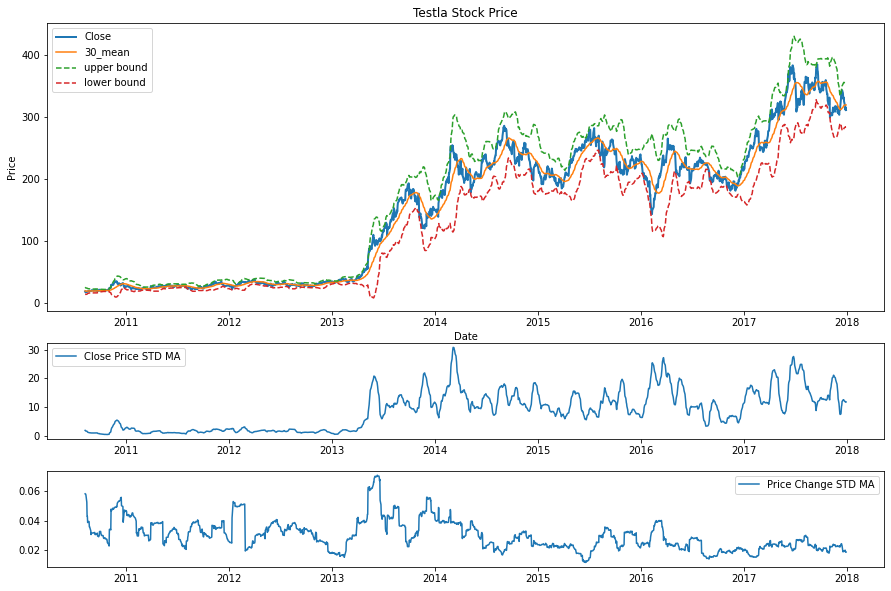

In [21]:
fig,ax=plt.subplots(3,1, gridspec_kw={'height_ratios': [3,1,1]},figsize=(15,10))
ax[0].plot(tesla_data["Close"],label="Close",linewidth=2)

ax[0].plot(tesla_data["Close_{}_SMA".format(day)],label="{}_mean".format(day))
ax[0].plot(tesla_data["Close_{}_SMA".format(day)]+3*tesla_data["Close_{}_std_SMA".format(day)],linestyle="--",label="upper bound")
ax[0].plot(tesla_data["Close_{}_SMA".format(day)]-3*tesla_data["Close_{}_std_SMA".format(day)],linestyle="--",label="lower bound")

ax[0].legend()
ax[0].set_title("Testla Stock Price")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")

ax[1].plot(tesla_data["Close_{}_std_SMA".format(day)],label="Close Price STD MA")
ax[1].legend()
ax[2].plot(tesla_data["price_change_{}_std_SMA".format(day)],label="Price Change STD MA")
ax[2].legend()

plt.show()

In [23]:
def trade_signal(df,stop_std_level=2,day=day,std_type="Close"):
    df_signal=pd.DataFrame(index=df.index)
    do_nothing_std_level=df["{}_{}_std_SMA".format(std_type,day)].mean()*stop_std_level
    for i in df.index:
        if df["{}_{}_std_SMA".format(std_type,day)].loc[i]>do_nothing_std_level:
            df_signal.at[i,"signal"]="do_nothing"
        elif df["Close_{}_SMA".format(day)].loc[i]<df["Close"].loc[i]:
            df_signal.at[i,"signal"]="buy"
        else:
            df_signal.at[i,"signal"]="sell"
    return df_signal
            
def backtesting(df,year,money):

    df_=df[df.index.year==year]
    df_["price_change_t+1"]=df_["price_change"].shift(-1)
    earning_list=[]
    money_list=[]
    for i in df_.index:
        if df_.loc[i]["signal"]=="buy":
            earning=df_.loc[i]["price_change_t+1"]
        elif df_.loc[i]["signal"]=="sell":
            earning=-1*df_.loc[i]["price_change_t+1"]
            
        elif df_.loc[i]["signal"]=="do_nothing":
            earning=0
        
        money=money*(1+earning)
        earning_list.append(earning)
        money_list.append(money)
    earning_list[-1]=0
    
    return earning_list,money_list
        

In [24]:
tesla_data["signal"]=trade_signal(tesla_data)

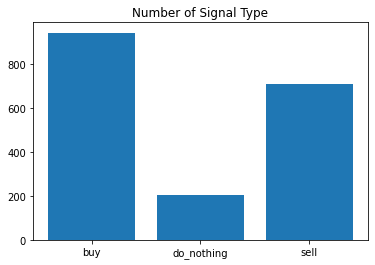

In [25]:
plt.bar(tesla_data.groupby("signal").count().index.values,tesla_data.groupby("signal").count()["Close"].values)
plt.title("Number of Signal Type")
plt.show()

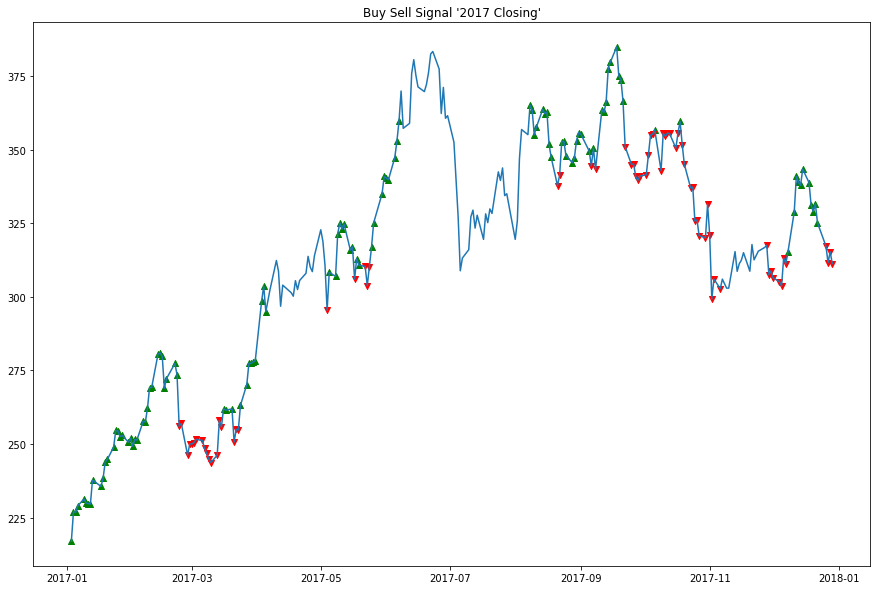

In [26]:
traiding_year=tesla_data[tesla_data.index.year==2017]
traiding_year_buy=traiding_year[traiding_year["signal"]=="buy"]
traiding_year_sell=traiding_year[traiding_year["signal"]=="sell"]

plt.figure(figsize=(15,10))
plt.plot(traiding_year["Close"])

plt.scatter(traiding_year_buy.index,traiding_year_buy["Close"],marker="^",color="green")
plt.scatter(traiding_year_sell.index,traiding_year_sell["Close"],marker="v",color="red")
plt.title("Buy Sell Signal '2017 Closing'")
plt.show()

### Task 5

One important baseline strategy that is commonly used in trading algorithm evaluation is buy and hold strategy. Assume that you have invested 1 unit of money every day (in the form of a "buy" decision) and hold it. What is the final status of your investment. Compare with your proposed strategy.